In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
combined_data_df = pd.merge(ride_data_df, city_data_df,on='city',how = 'outer' )
combined_data_df
# Display the data table for preview


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban
5,Lake Jonathanshire,2018-04-06 11:30:32,16.84,6164453571846,5,Urban
6,Lake Jonathanshire,2018-03-21 00:18:34,37.95,8353656732934,5,Urban
7,Lake Jonathanshire,2018-01-28 00:07:00,5.67,9756573174778,5,Urban
8,Lake Jonathanshire,2018-01-24 12:24:22,34.65,3319117904437,5,Urban
9,Lake Jonathanshire,2018-03-24 16:27:49,14.94,1670908453476,5,Urban


In [2]:
# Replace all NaN values with 0 
combined_data_df = combined_data_df.fillna(0)
#USE DROP FUNCTION

#Average Fare Per City 
average_fare = (combined_data_df.groupby(['city','type']))
#(combined_data_df.groupby(['city', 'type'], as_index=False).mean()
#            .groupby('city')['fare'].mean())


df_1 = pd.DataFrame(average_fare['fare'].mean())
df_2 = pd.DataFrame(average_fare['fare'].count())
df_3 = pd.DataFrame(average_fare['driver_count'].sum())

In [3]:
df_12 = pd.merge(df_1,df_2, on=['city','type'])

In [4]:
final_df = pd.merge(df_12,df_3, on=['city','type'])
final_df.head()

,,fare_x,fare_y,driver_count
city,type,,,
Amandaburgh,Urban,24.641667,18,216
Barajasview,Urban,25.332273,22,572
Barronchester,Suburban,36.422500,16,176
Bethanyland,Suburban,32.956111,18,396
Bradshawfurt,Rural,40.064000,10,70


In [5]:
final_df = final_df.rename(columns = {'fare_x':'Average_fare','fare_y':'Number_of_Rides'})
final_df.head()

,,Average_fare,Number_of_Rides,driver_count
city,type,,,
Amandaburgh,Urban,24.641667,18,216
Barajasview,Urban,25.332273,22,572
Barronchester,Suburban,36.422500,16,176
Bethanyland,Suburban,32.956111,18,396
Bradshawfurt,Rural,40.064000,10,70


In [6]:
final_df = final_df.reset_index(level = 'type')

In [7]:
final_df.head()

,type,Average_fare,Number_of_Rides,driver_count
city,,,,
Amandaburgh,Urban,24.641667,18,216
Barajasview,Urban,25.332273,22,572
Barronchester,Suburban,36.422500,16,176
Bethanyland,Suburban,32.956111,18,396
Bradshawfurt,Rural,40.064000,10,70


In [8]:
final_df['type_id'] = pd.Categorical(final_df['type'], categories=final_df['type'].unique()).codes
final_df

,type,Average_fare,Number_of_Rides,driver_count,type_id
city,,,,,
Amandaburgh,Urban,24.641667,18,216,0
Barajasview,Urban,25.332273,22,572,0
Barronchester,Suburban,36.422500,16,176,1
Bethanyland,Suburban,32.956111,18,396,1
Bradshawfurt,Rural,40.064000,10,70,2
Brandonfort,Suburban,35.437368,19,190,1
Carriemouth,Urban,28.314444,27,1404,0
Christopherfurt,Urban,24.501852,27,1107,0
Colemanland,Suburban,30.894545,22,506,1


In [9]:
#Total Number of Rides Per City

number_rides = combined_data_df["city"].value_counts()
number_rides

West Angela        39
South Karenland    38
North Jason        35
Port Frank         33
Liumouth           33
                   ..
Penaborough         5
Randallchester      5
Newtonview          4
South Saramouth     4
Garzaport           3
Name: city, Length: 120, dtype: int64

In [10]:
#Total number of drivers per city 

number_drivers = (combined_data_df.groupby(['city', 'type'], as_index=False).mean()
            .groupby('city')['driver_count'].sum())


number_drivers

city
Amandaburgh         12.0
Barajasview         26.0
Barronchester       11.0
Bethanyland         22.0
Bradshawfurt         7.0
                    ... 
West Robert         39.0
West Samuelburgh    73.0
Williamsonville      2.0
Williamsstad        59.0
Williamsview        46.0
Name: driver_count, Length: 120, dtype: float64

In [11]:
total_drivers = combined_data_df['driver_count'].sum()
# print(total_drivers)
total_drivers

68709

In [41]:
total_drivers_by_type = (combined_data_df.groupby(['city', 'type'], as_index=False).mean()
            .groupby('type')['driver_count'].sum())


total_drivers_by_type

type
Rural         78.0
Suburban     490.0
Urban       2405.0
Name: driver_count, dtype: float64

In [12]:
#City_Types 

city_type = (combined_data_df["type"].value_counts())

city_type 

Urban       1625
Suburban     625
Rural        125
Name: type, dtype: int64

In [43]:
total_fares_by_type = (combined_data_df.groupby(['city', 'type'], as_index=False).mean()
            .groupby('type')['fare'].sum())


total_fares_by_type

type
Rural        623.479771
Suburban    1106.542729
Urban       1616.942033
Name: fare, dtype: float64

## Bubble Plot of Ride Sharing Data

No handles with labels found to put in legend.


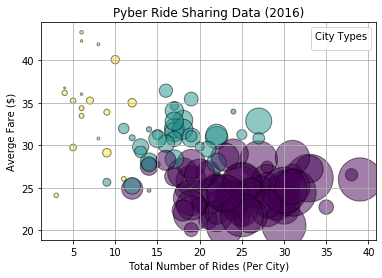

In [14]:
# Obtain the x and y coordinates for each of the three city types

#Give them a variable to plot it in x, y
#x axis = total number of rides 
#y axis = average fare 
# circle size = driver count 

# create data
x= final_df['Number_of_Rides']
y= final_df['Average_fare']
z = final_df['driver_count']
 
# use the scatter function
plt.title("Pyber Ride Sharing Data (2016)")
plt.grid()
plt.ylabel("Averge Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.scatter(x, y, s=z,c=final_df['type_id'],alpha = 0.5, edgecolors="black")
plt.legend(title = "City Types")
plt.show()

final_df['type_id'] = pd.Categorical(final_df['type'], categories=final_df['type'].unique()).codes

# Build the scatter plots for each city types

# Incorporate the other graph properties



# Create a legend

# Incorporate a text label regarding circle size

# Save Figure


In [15]:
# Show plot
plt.show()

## Total Fares by City Type

Total Fare is  3346.9645330759026


C:\Users\Pooja\Anaconda\Anaconda\lib\site-packages\ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  del sys.path[0]


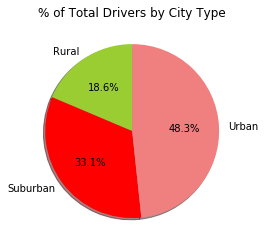

In [44]:
# Calculate Type Percents
total_fare = final_df['Average_fare'].sum()
print (f"Total Fare is  {total_fare}")


pie_city_type = ['Rural','Suburban','Urban']
pie_total_fares = [total_fares_by_type]
colors = ["yellowgreen", "red", "lightcoral", "lightskyblue"]
explode = (0, 0.05, 0)
# Save Figure
plt.title("% of Total Drivers by City Type")
plt.pie(pie_total_fares,explode=None,labels=pie_city_type,colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)

plt.show()



In [17]:
# Show Figure
plt.show()

## Total Rides by City Type

C:\Users\Pooja\Anaconda\Anaconda\lib\site-packages\ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  if sys.path[0] == '':


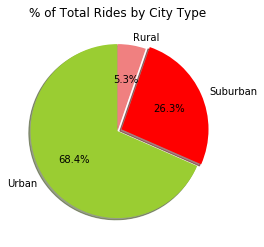

In [18]:
# Calculate Ride Percents

# Build Pie Chart
# DATASET 3
pie_city_type = ['Urban','Suburban','Rural']
pie_total_rides = [city_type]
colors = ["yellowgreen", "red", "lightcoral", "lightskyblue"]
explode = (0, 0.05, 0)
# Save Figure
plt.title("% of Total Rides by City Type")
plt.pie(pie_total_rides,explode=explode,labels=pie_city_type,colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)

plt.show()




In [19]:
# Show Figure
plt.show()

## Total Drivers by City Type

C:\Users\Pooja\Anaconda\Anaconda\lib\site-packages\ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  if sys.path[0] == '':


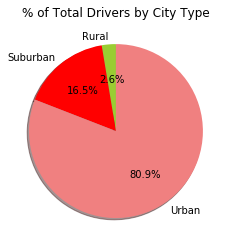

In [36]:
# Calculate Driver Percents

# Build Pie Charts

pie_city_type = ['Rural','Suburban','Urban']
pie_total_drivers = [total_drivers_by_type]
colors = ["yellowgreen", "red", "lightcoral", "lightskyblue"]
explode = (0, 0.05, 0)
# Save Figure
plt.title("% of Total Drivers by City Type")
plt.pie(pie_total_drivers,explode=None,labels=pie_city_type,colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)

plt.show()


# Save Figure


In [ ]:
# Show Figure
plt.show()